In [ ]:
import test_models
import pandas as pd
import dataframe_image as dfi
import importlib

importlib.reload(test_models)
#np.random.seed(13)
#random.seed(13)

data = []
items = ['tables','chairs', 'octopus', 'spiders']
all_scores = []
for k in [3]:
    for ff in ['Projection', 'PCA']:
        for co in ['CubicalCover4-0.1', 'CubicalCover3-0.15']:
            for cl in ['DBSCAN10']:
                print("\nStart computing model accuracy... ")
                scores, scores_wo_homology, majority_classifier = test_models.model_accuracy(k, filter_func=ff, cover=co, clusterer=cl)
                res_w_homology = [x[:2] for x in scores[:3]]
                [all_scores.append((scores[i], (items[k], ff, co, cl))) for i in range(len(scores))]
                res_wo_homology = [x[:2] for x in scores_wo_homology[:3]]
                [all_scores.append((scores_wo_homology[i], (items[k], ff, co, cl))) for i in range(len(scores_wo_homology))]
                res_best = res_w_homology[0] if res_w_homology[0][0] > res_wo_homology[0][0] else res_wo_homology[0]
                res_wo_h = [x[:2] for x in scores_wo_homology if x[1] == res_best[1][:-2]]+[None] if res_best[1][-2] == 'h' else res_best
                res_h = [x[:2] for x in scores if x[1] == "h"+res_best[1][-1]] if res_best[1][-2] == 'h' else [None]
                print(res_best[1][:-2], res_wo_h, res_best[1][-2:], res_h)
                data.append([items[k], ff, co, cl, res_best, res_h[0], res_wo_h[0], majority_classifier])
                print(items[k], ff, co, cl)
                print(res_w_homology[:3], res_wo_homology[0], majority_classifier)

table = pd.DataFrame(data, range(len(data)), ["items", "filter function", "cover", "clusterer", "accuracy scores w homology", "accuracy scores homology", "accuracy score wo homology", "majority classifier"])
dfi.export(table,"results/tables/mytable.png")


Start computing model accuracy... 
- processing data
- computing feature vectors
 99%
- calculating accuracy scores
7 9 11 1 (0.7127272727272727, '7 9 11 13 ') 3  [None]
spiders Projection CubicalCover4-0.1 DBSCAN10
[(0.7027272727272728, '3 7 13 h1'), (0.7027272727272728, '1 7 13 h1'), (0.6936363636363637, '0 7 11 h2')] (0.7127272727272727, '7 9 11 13 ') 0.693069306930693

Start computing model accuracy... 
- processing data
- computing feature vectors
 61%

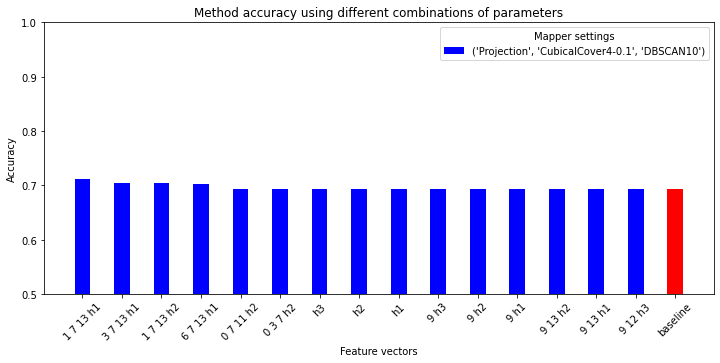

In [6]:
item_index = 3
scores = [x for x in all_scores if x[1][0] == items[item_index]]
scores.sort(key=lambda x: x[0][0], reverse=True)
test_models.visualize_scores(scores[:15], majority_classifier)